<a href="https://colab.research.google.com/github/rajeshvalluri/MNIST_TF/blob/master/MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [13]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy import *
from PIL import Image, ImageOps
%matplotlib inline


In [3]:
#Load the MNIST files from Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [5]:
input_shape = 784

In [16]:
#Load data and labels into X_train and y_train respectively
X_train = []
y_train = []
for rows in data_list:
  X_train.append(np.asfarray(rows.split(',')[1:]).reshape([28,28]))
  y_train.append(int(rows.split(',')[0]))

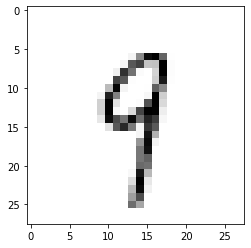

In [17]:
#Check a couple of images and their corresponding labels.
X_train = np.array(X_train)/255.0 + 0.01#scaling input data to be between 0 and 1
y_train = np.array(y_train)
X_train = X_train
plt.pyplot.imshow(X_train[900],cmap='Greys',interpolation='None')

In [110]:
model = Sequential()
model.add(Conv2D(32,(4,4),activation='relu',input_shape=(28,28,1) ,padding='same'))
model.add(MaxPool2D(pool_size=(3,3),padding='same'))
model.add(Flatten())
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units=10,activation='softmax'))
opt = tf.keras.optimizers.Adam()
metrics = 'accuracy'
loss = 'sparse_categorical_crossentropy'
model.compile(optimizer=opt,loss=loss,metrics=[metrics])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               320100    
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)             

In [43]:
print(X_train.shape)

(60000, 28, 28)


In [111]:
model.fit(X_train[...,np.newaxis],y_train,verbose=1,epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2728 - accuracy: 0.9186
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0781 - accuracy: 0.9761
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0541 - accuracy: 0.9835
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9887
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0256 - accuracy: 0.9918
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9951

In [112]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_test.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [113]:
model.save("//content/gdrive/My Drive/MNIST/trained_model")

INFO:tensorflow:Assets written to: //content/gdrive/My Drive/MNIST/trained_model/assets


In [114]:
#Load data and labels into X_test and y_test respectively
X_test = []
y_test = []
for rows in data_list:
  X_test.append(np.asfarray(rows.split(',')[1:]).reshape([28,28]))
  y_test.append(int(rows.split(',')[0]))
X_test = np.array(X_test)/255.0 + 0.01 #scaling test data
y_test = np.array(y_test)

In [115]:
#Evaluate the trained model on test data
model.evaluate(X_test[...,np.newaxis],y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9908


[0.03716560825705528, 0.9908000230789185]

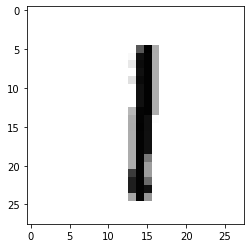

In [116]:
#Check a couple of images and their corresponding labels.
plt.pyplot.imshow(X_test[180],cmap='Greys',interpolation='None')
#print(X_test[1458])

In [117]:
pred_image = X_test[180]
print(pred_image.shape)
#pred_image[np.newaxis,...,np.newaxis]
np.argmax(model.predict(pred_image[np.newaxis,...,np.newaxis]))

(28, 28)


1

In [ ]:
pip install pillow

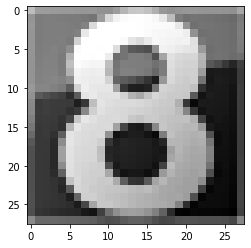

In [141]:
img = Image.open("//content/gdrive/My Drive/MNIST/eight.png")
img = img.convert("L")
img = np.array(img.resize((28,28)))
img = (255.0 - img)/255.0 * 0.99  + 0.01
plt.pyplot.imshow(img,cmap='Greys',interpolation='None')

In [142]:
np.argmax(model.predict(img[np.newaxis,...,np.newaxis]))
#model.predict(img[np.newaxis,...,np.newaxis])

6